In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
nyc2022= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2022.csv")
nyc2021= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2021.csv")
nyc2019= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2019.csv")
nyc2018= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2018.csv")
nyc2017= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2017.csv")
nyc2016= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2016.csv")
nyc2015= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2015.csv")
nyc2014= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2014.csv")
nyc2013= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2013.csv")
nyc2011= pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/nyc/2011.csv")


In [3]:
print(nyc2022)

                                                   Name Gender_Age  Place  \
0     \n                                Evans Chebet...        M33      1   
1     \n                                Shura Kitata...        M26      2   
2     \n                                Abdi Nageeye...        M33      3   
3     \n                                Mohamed El A...        M32      4   
4     \n                                Suguru Osako...        M31      5   
...                                                 ...        ...    ...   
5146  \n                                Quentin Mui\...        M38  5,147   
5147  \n                                Christine Qu...        F48  5,148   
5148  \n                                Alexandra Ba...        F37  5,149   
5149  \n                                Lauren Duffy...        F31  5,150   
5150  \n                                Simon Stange...        M33  5,151   

       Pace Official_Time Gender  Age        Time  Year  
0     04:55      

In [5]:
result22=nyc2022[["Age","Gender","Time","Year"]]
result21=nyc2021[["Age","Gender","Time","Year"]]
result19=nyc2019[["Age","Gender","Time","Year"]]
result18=nyc2018[["Age","Gender","Time","Year"]]
result17=nyc2017[["Age","Gender","Time","Year"]]
result16=nyc2016[["Age","Gender","Time","Year"]]
result15=nyc2015[["Age","Gender","Time","Year"]]
result14=nyc2014[["Age","Gender","Time","Year"]]
result13=nyc2013[["Age","Gender","Time","Year"]]
result11=nyc2011[["Age","Gender","Time","Year"]]

In [6]:
result=pd.concat([result11,result13,result14,result15,result16,result17,result18,result19,result21,result22], axis=0, ignore_index=True)
len(result)

51508

In [7]:
weather=pd.read_csv("/Users/yunzehe/Desktop/MAST397/Final/NYC_Weather.csv")
print(weather)

    Year           City    datetime  tempmax  tempmin  temp  feelslikemax  \
0   2000  New York City   2000/11/5     11.6      7.5   9.7          11.6   
1   2001  New York City   2001/11/4     16.3      9.5  12.7          16.3   
2   2002  New York City   2002/11/3      7.5      3.1   5.6           4.9   
3   2003  New York City   2003/11/2     19.4     14.5  16.7          19.4   
4   2004  New York City   2004/11/7     20.6      6.7  14.0          20.6   
5   2005  New York City   2005/11/6     19.7     11.2  15.3          19.7   
6   2006  New York City   2006/11/5      9.5      2.5   6.3           8.8   
7   2007  New York City   2007/11/4     13.2      7.5  10.5          13.2   
8   2008  New York City   2008/11/2     10.7      3.2   7.2          10.7   
9   2009  New York City   2009/11/1     15.2      9.6  12.3          15.2   
10  2010  New York City   2010/11/7     10.2      2.5   6.5          10.2   
11  2011  New York City   2011/11/6     12.2      3.8   8.2          12.2   

In [82]:
temp=[]
humi=[]
winds=[]
sealevelpressure=[]

In [83]:
#get weather data for every runner from weather dataframe
for x in range(0,len(result)):#every row of time
    year=result.loc[x]["Year"]
    temp.extend(weather.loc[weather["Year"]==year]["temp"])#temp
    humi.extend(weather.loc[weather["Year"]==year]["humidity"])
    winds.extend(weather.loc[weather["Year"]==year]["windspeed"])
    sealevelpressure.extend(weather.loc[weather["Year"]==year]["sealevelpressure"])
    

In [84]:
# add weather data into dataframe
result["temp"]=temp
result["humidity"]=humi
result["windspeed"]=winds
result["sealevelpressure"]=sealevelpressure

In [85]:
print(result)

       Age Gender        Time  Year  temp  humidity  windspeed  \
0       30      M  125.100000  2011   8.2      58.3       13.9   
1       27      M  126.466667  2011   8.2      58.3       13.9   
2       24      M  127.233333  2011   8.2      58.3       13.9   
3       27      M  128.000000  2011   8.2      58.3       13.9   
4       39      M  128.433333  2011   8.2      58.3       13.9   
...    ...    ...         ...   ...   ...       ...        ...   
51503   38      M  220.633333  2022  20.7      76.1       14.8   
51504   48      F  220.633333  2022  20.7      76.1       14.8   
51505   37      F  220.633333  2022  20.7      76.1       14.8   
51506   31      F  220.650000  2022  20.7      76.1       14.8   
51507   33      M  220.650000  2022  20.7      76.1       14.8   

       sealevelpressure  
0                1031.7  
1                1031.7  
2                1031.7  
3                1031.7  
4                1031.7  
...                 ...  
51503            1022.4  

In [86]:
#function of overal plot all genders and age groups 
def overallPlot(xVar,yVar,xRan,yRan,tittle,xlab,ylab):#var,var,int,int,str,str,str
    mymodel = np.poly1d(np.polyfit(xVar, yVar, 1))
    myline = np.linspace(xRan, yRan, 100)
    plt.plot(myline, mymodel(myline),"r")
    plt.scatter(xVar, yVar)
    plt.title(tittle)
    plt.ylabel(ylab)
    plt.xlabel(xlab)

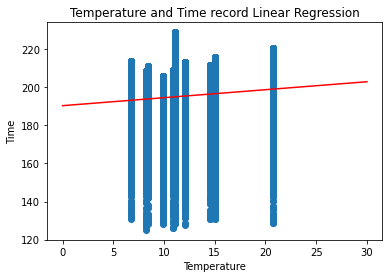

In [87]:
#plot of all age groups and genders with Temperature
overallPlot(result["temp"],result["Time"],0,30,'Temperature and Time record Linear Regression','Temperature','Time')

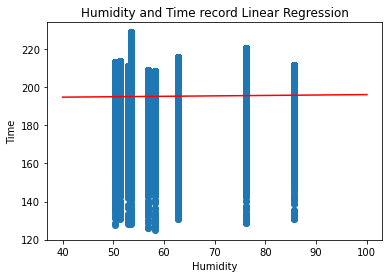

In [88]:
#plot of all age groups and genders with Humidity
overallPlot(result["humidity"],result["Time"],40,100,'Humidity and Time record Linear Regression','Humidity','Time')

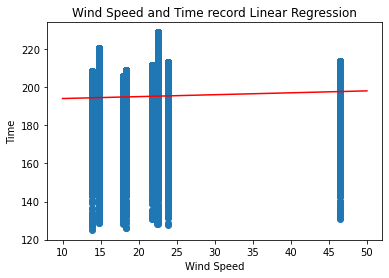

In [31]:
#plot of all age groups and genders with Wind Speed
overallPlot(result["windspeed"],result["Time"],10,50,'Wind Speed and Time record Linear Regression','Wind Speed','Time')

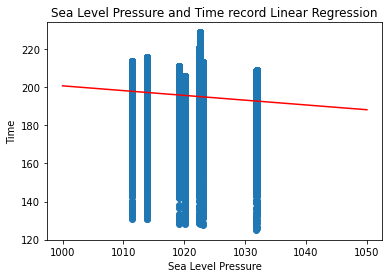

In [32]:
#plot of all age groups and genders with Sea Level Pressure
overallPlot(result["sealevelpressure"],result["Time"],1000,1050,'Sea Level Pressure and Time record Linear Regression','Sea Level Pressure','Time')

In [120]:
#different gender group
gender_M=result.loc[result["Gender"]=="M"]
gender_F=result.loc[result["Gender"]=="F"]

Text(0.5, 0, 'Gender')

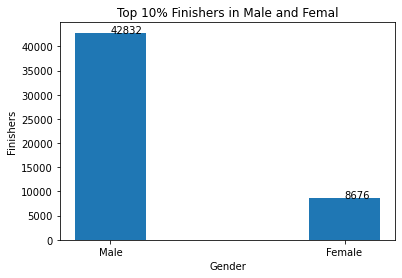

In [151]:
plt.bar(["Male","Female"],[len(gender_M),len(gender_F)],width=0.3)
xlocs=["Male","Female"]
plt.text("Male",len(gender_M),len(gender_M))
plt.text("Female",len(gender_F),len(gender_F))
plt.title("Top 10% Finishers in Male and Femal")
plt.ylabel('Finishers')
plt.xlabel('Gender')

Text(0.5, 0, 'Gender')

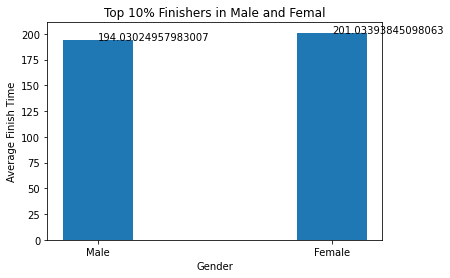

In [155]:
plt.bar(["Male","Female"],[(sum(gender_M["Time"])/len(gender_M)),(sum(gender_F["Time"])/len(gender_F))],width=0.3)
xlocs=["Male","Female"]
plt.text("Male",(sum(gender_M["Time"])/len(gender_M)),(sum(gender_M["Time"])/len(gender_M)))
plt.text("Female",(sum(gender_F["Time"])/len(gender_F)),(sum(gender_F["Time"])/len(gender_F)))
plt.title("Top 10% Finishers in Male and Femal")
plt.ylabel('Average Finish Time')
plt.xlabel('Gender')

In [49]:
#different age group of male
age_under20m=result.loc[(result["Age"]<20)&(result["Gender"]=="M")]
age_20to30m=result.loc[(result["Age"]<30)&(result["Age"]>=20)&(result["Gender"]=="M")]
age_30to40m=result.loc[(result["Age"]<40)&(result["Age"]>=30)&(result["Gender"]=="M")]
age_40to50m=result.loc[(result["Age"]<50)&(result["Age"]>=40)&(result["Gender"]=="M")]
age_50to60m=result.loc[(result["Age"]<60)&(result["Age"]>=50)&(result["Gender"]=="M")]
age_over60m=result.loc[(result["Age"]>=60)&(result["Gender"]=="M")]

#different age group of female
age_under20f=result.loc[(result["Age"]<20)&(result["Gender"]=="F")]
age_20to30f=result.loc[(result["Age"]<30)&(result["Age"]>=20)&(result["Gender"]=="F")]
age_30to40f=result.loc[(result["Age"]<40)&(result["Age"]>=30)&(result["Gender"]=="F")]
age_40to50f=result.loc[(result["Age"]<50)&(result["Age"]>=40)&(result["Gender"]=="F")]
age_50to60f=result.loc[(result["Age"]<60)&(result["Age"]>=50)&(result["Gender"]=="F")]
age_over60f=result.loc[(result["Age"]>=60)&(result["Gender"]=="F")]

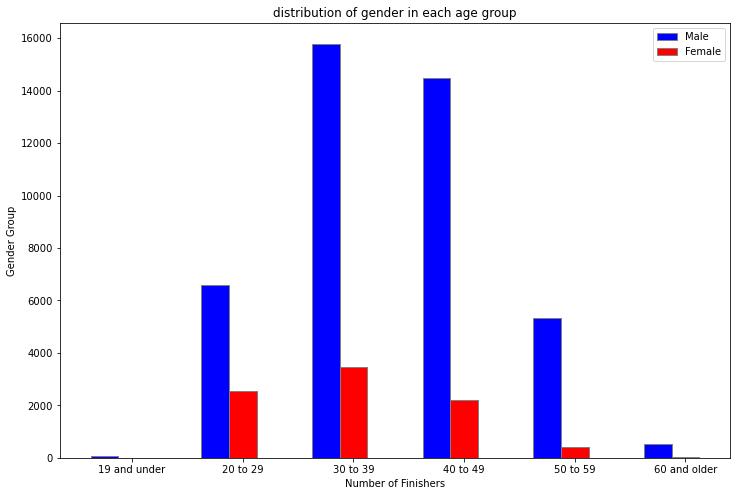

In [28]:
#plot of different age group
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
plt_age_m=[len(age_under20m),len(age_20to30m),len(age_30to40m),len(age_40to50m),len(age_50to60m),len(age_over60m)]
plt_age_f=[len(age_under20f),len(age_20to30f),len(age_30to40f),len(age_40to50f),len(age_50to60f),len(age_over60f)]
age_group=["19 and under","20 to 29","30 to 39","40 to 49","50 to 59","60 and older"]

br1 = np.arange(len(plt_age_m))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, plt_age_m, color ='b', width = barWidth,edgecolor ='grey', label ='Male')
plt.bar(br2, plt_age_f, color ='r', width = barWidth,edgecolor ='grey', label ='Female')

plt.xlabel('Number of Finishers')
plt.ylabel('Gender Group')
plt.title("distribution of gender in each age group")
plt.xticks([r + barWidth for r in range(len(plt_age_m))],age_group)

    
plt.legend()
plt.show()


In [35]:
allage_m=result.loc[(result["Gender"]=="M")]
allage_f=result.loc[(result["Gender"]=="F")]

In [36]:
print(allage_m)

       Age Gender        Time  Year  temp  humidity  windspeed  \
0       30      M  125.100000  2011   8.2      58.3       13.9   
1       27      M  126.466667  2011   8.2      58.3       13.9   
2       24      M  127.233333  2011   8.2      58.3       13.9   
3       27      M  128.000000  2011   8.2      58.3       13.9   
4       39      M  128.433333  2011   8.2      58.3       13.9   
...    ...    ...         ...   ...   ...       ...        ...   
51499   40      M  220.616667  2022  20.7      76.1       14.8   
51500   56      M  220.616667  2022  20.7      76.1       14.8   
51501   51      M  220.616667  2022  20.7      76.1       14.8   
51503   38      M  220.633333  2022  20.7      76.1       14.8   
51507   33      M  220.650000  2022  20.7      76.1       14.8   

       sealevelpressure  
0                1031.7  
1                1031.7  
2                1031.7  
3                1031.7  
4                1031.7  
...                 ...  
51499            1022.4  

In [33]:
#function of p and r value
# r = correlation coefficient
# p and r value of temp for all age
def prValue(ageM_Cond,TimeM,ageF_Cond,TimeF,cond,ageGroup):#var,var,var,var,str,str
    r1,p1 = stats.pearsonr(ageM_Cond, TimeM)
    r2,p2 = stats.pearsonr(ageF_Cond, TimeF)
    print(cond+" for "+ageGroup )
    print(" ")
    print("p value for male = "+str(p1))
    print("r value for male = "+str(r1))
    print("p value for female = "+str(p2))
    print("r value for female = "+str(r2))
    if(p1<0.05):
        print("p value of male is smaller than 0.05, significant level is high")
    else:
        print("p value of male is not smaller than 0.05, significant level is not high enough")
    if(p2<0.05):
        print("p value of female is smaller than 0.05, significant level is high")
    else:
        print("p value of female is not smaller than 0.05, significant level is not high enough")

In [ ]:
"""
r=1 Positive Correlation
r=-1 Negative Correlation
1>|r|>0.95 Obvious Correlation
|r|>=0.8 High Linear Correlation
0.8>

"""

In [47]:
#function for plot 4 subplots of all condition in each age group
def subPlots(xVarm1,xVarm2,xVarm3,xVarm4,yVarm,xVarf1,xVarf2,xVarf3,xVarf4,yVarf,tittle_C):
    fig, ax = plt.subplots(2, 2,figsize=(15,15))

    #Temperature
    mymodel1 = np.poly1d(np.polyfit(xVarm1, yVarm, 1))
    myline = np.linspace(0, 30, 100)
    ax[0,0].plot(myline, mymodel1(myline),"b",label = "Male")

    mymodel2 = np.poly1d(np.polyfit(xVarf1, yVarf, 1))
    myline = np.linspace(0, 30, 10)
    ax[0,0].plot(myline, mymodel2(myline),"r",label = "Female")
    
    ax[0,0].scatter(xVarm1, yVarm,label="Male")
    ax[0,0].scatter(xVarf1, yVarf,label="Female")
    ax[0,0].title.set_text("Temperature and Time record Linear Regression")
    ax[0,0].legend()

    #Humidity
    mymodel1 = np.poly1d(np.polyfit(xVarm2, yVarm, 1))
    myline = np.linspace(40, 100, 10)
    ax[0,1].plot(myline, mymodel1(myline),"b",label = "Male")

    mymodel2 = np.poly1d(np.polyfit(xVarf2, yVarf, 1))
    myline = np.linspace(40, 100, 10)
    ax[0,1].plot(myline, mymodel2(myline),"r",label = "Female")

    ax[0,1].scatter(xVarm2, yVarm,label="Male")
    ax[0,1].scatter(xVarf2, yVarf,label="Female")
    ax[0,1].title.set_text("Humidity and Time record Linear Regression")
    ax[0,1].legend()

    #wind speed
    mymodel1 = np.poly1d(np.polyfit(xVarm3, yVarm, 1))
    myline = np.linspace(0, 60, 10)
    ax[1,0].plot(myline, mymodel1(myline),"b",label = "Male")

    mymodel2 = np.poly1d(np.polyfit(xVarf3, yVarf, 1))
    myline = np.linspace(0, 60, 10)
    ax[1,0].plot(myline, mymodel2(myline),"r",label = "Female")

    ax[1,0].scatter(xVarm3, yVarm,label="Male")
    ax[1,0].scatter(xVarf3, yVarf,label="Female")
    ax[1,0].title.set_text("Wind Speed and Time record Linear Regression")
    ax[1,0].legend()

    #sea level pressure
    mymodel1 = np.poly1d(np.polyfit(xVarm4, yVarm, 1))
    myline = np.linspace(1000, 1050, 10)
    ax[1,1].plot(myline, mymodel1(myline),"b",label = "Male")

    mymodel2 = np.poly1d(np.polyfit(xVarf4, yVarf, 1))
    myline = np.linspace(1000, 1050, 10)
    ax[1,1].plot(myline, mymodel2(myline),"r",label = "Female")

    ax[1,1].scatter(xVarm4, yVarm,label="Male")
    ax[1,1].scatter(xVarf4, yVarf,label="Female")
    ax[1,1].title.set_text("Sea Level Pressure and Time record Linear Regression")
    ax[1,1].legend()

    plt.setp(ax[0, 1], xlabel='Hudimity')
    plt.setp(ax[0, 0], xlabel='Temperature')
    plt.setp(ax[1, 0], xlabel='Wind Speed')
    plt.setp(ax[1, 1], xlabel='Sea Level Pressure')

    plt.setp(ax[0, 1], ylabel='Time')
    plt.setp(ax[0, 0], ylabel='Time')
    plt.setp(ax[1, 0], ylabel='Time')
    plt.setp(ax[1, 1], ylabel='Time')
    plt.suptitle(tittle_C,fontsize=35)
        

In [38]:
# p and r value of temp for all age 
prValue(allage_m.temp,allage_m.Time,allage_f.temp,allage_f.Time,'Temperature','All Age Groups')

Temperature for All Age Groups
 
p value for male = 1.3591309083708278e-76
r value for male = 0.08932222240077531
p value for female = 7.939790528413711e-39
r value for female = 0.1392596045892956
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


In [39]:
# p and r value of humi for all age 
prValue(allage_m.humidity,allage_m.Time,allage_f.humidity,allage_f.Time,'Humidity','All age Groups')

Humidity for All age Groups
 
p value for male = 0.00818090781527799
r value for male = 0.01277780118758833
p value for female = 0.08106537157850312
r value for female = 0.01873031468094264
p value of male is smaller than 0.05, significant level is high
p value of female is not smaller than 0.05, significant level is not high enough


In [40]:
# p and r value of wind speed for all age 
prValue(allage_m.windspeed,allage_m.Time,allage_f.windspeed,allage_f.Time,'Wind Speed','All age Groups')

Wind Speed for All age Groups
 
p value for male = 1.3163967340580716e-43
r value for male = 0.06683674254318842
p value for female = 0.035369121024713165
r value for female = 0.022589946149421693
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


In [41]:
# p and r value of Sea Level Pressure for all age 
prValue(allage_m.sealevelpressure,allage_m.Time,allage_f.sealevelpressure,allage_f.Time,'Sea Level Pressure','All age Groups')

Sea Level Pressure for All age Groups
 
p value for male = 1.1994865898185862e-99
r value for male = -0.10211916345910484
p value for female = 3.912534387157906e-16
r value for female = -0.08724974139333988
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


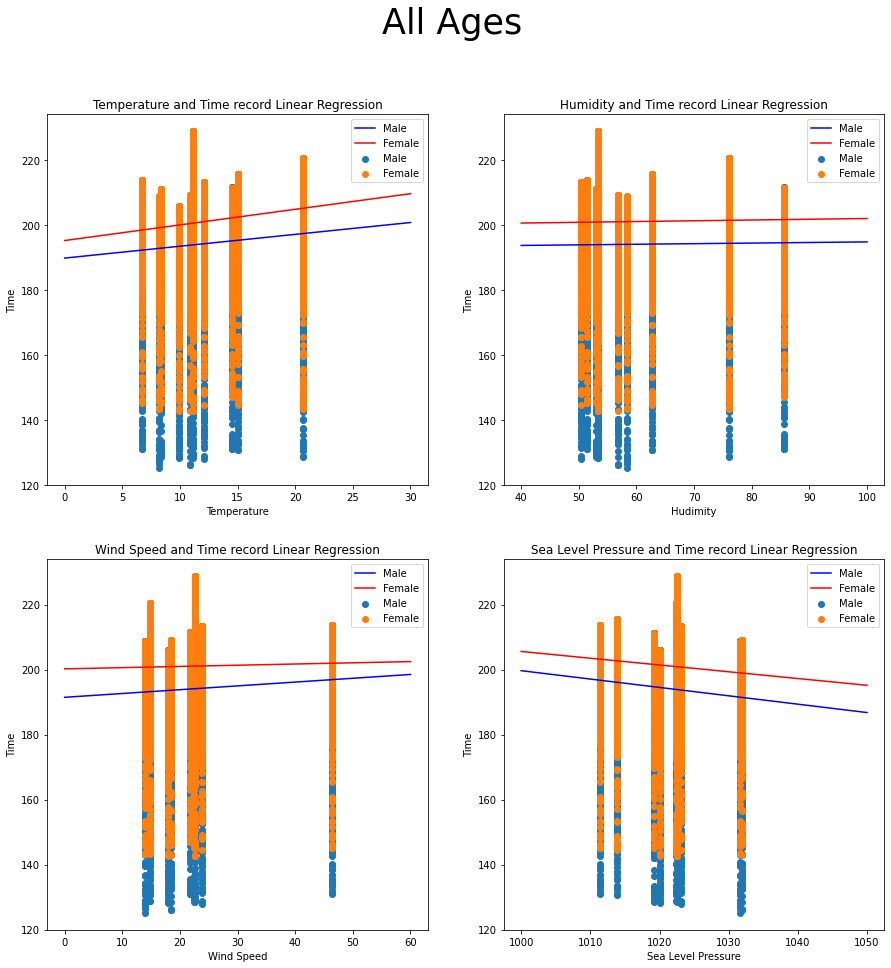

In [46]:
# plot for all age 
subPlots(allage_m["temp"],allage_m["humidity"],allage_m["windspeed"],allage_m["sealevelpressure"],allage_m["Time"],
allage_f["temp"],allage_f["humidity"],allage_f["windspeed"],allage_f["sealevelpressure"],allage_f["Time"],"All Ages")

In [50]:
# p and r value of temp for 19 and under
prValue(age_under20m.temp, age_under20m.Time, age_under20f.temp, age_under20f.Time ,'Temperature','19 and under')

Temperature for 19 and under
 
p value for male = 0.4671588000075675
r value for male = 0.08582984518623228
p value for female = 0.862604517845844
r value for female = -0.08120004869046696
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is not smaller than 0.05, significant level is not high enough


In [51]:
# p and r value of humi for 19 and under
prValue(age_under20m.humidity,age_under20m.Time,age_under20f.humidity,age_under20f.Time,'Humidity','19 and under')

Humidity for 19 and under
 
p value for male = 0.1002656893250117
r value for male = 0.19254640452683996
p value for female = 0.7129690283145322
r value for female = 0.1715900793867128
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is not smaller than 0.05, significant level is not high enough


In [52]:
# p and r value of wind speed for 19 and under 
prValue(age_under20m.windspeed,age_under20m.Time,age_under20f.windspeed,age_under20f.Time,'Wind Speed','19 and under')

Wind Speed for 19 and under
 
p value for male = 0.30314405048356835
r value for male = 0.12132451541554197
p value for female = 0.43740733807523186
r value for female = 0.3529639842385669
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is not smaller than 0.05, significant level is not high enough


In [53]:
# p and r value of Sea Level Pressure for 19 and under
prValue(age_under20m.sealevelpressure,age_under20m.Time,age_under20f.sealevelpressure,age_under20f.Time,'Sea Level Pressure','19 and under')

Sea Level Pressure for 19 and under
 
p value for male = 0.23678009290564755
r value for male = -0.13922877130531652
p value for female = 0.18058196282035074
r value for female = -0.5710238049985873
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is not smaller than 0.05, significant level is not high enough


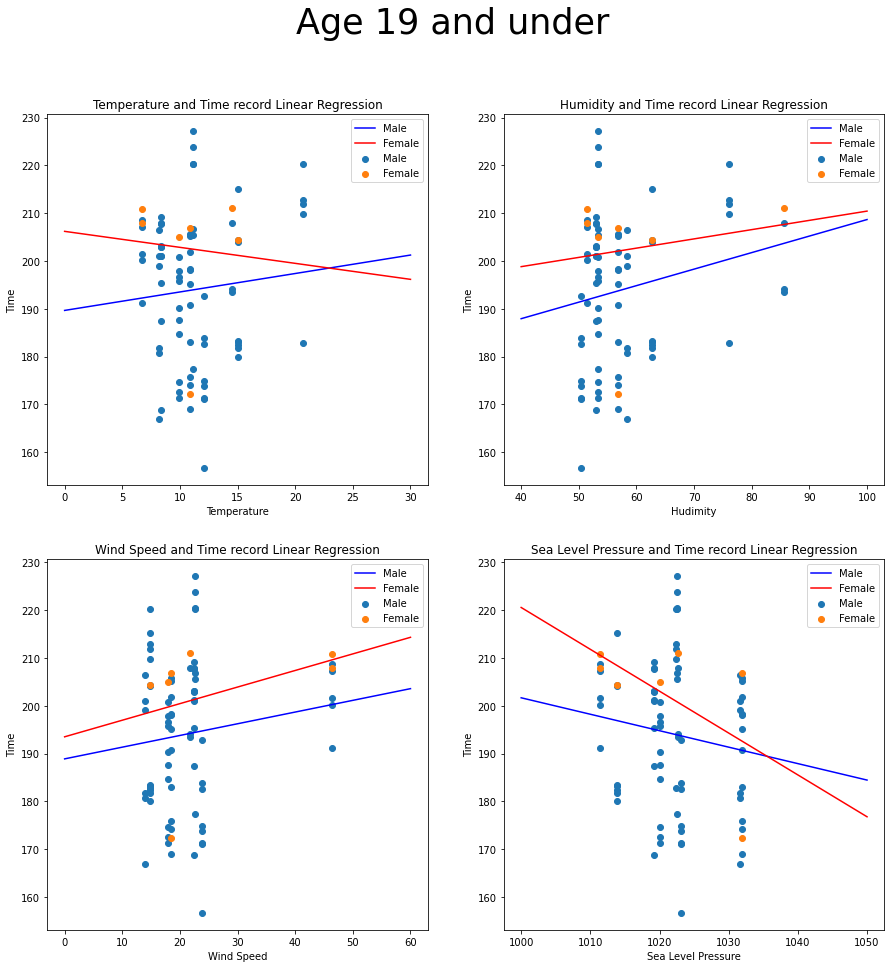

In [54]:
# for age 19 and under
subPlots(age_under20m["temp"],age_under20m["humidity"],age_under20m["windspeed"],age_under20m["sealevelpressure"],age_under20m["Time"],
age_under20f["temp"],age_under20f["humidity"],age_under20f["windspeed"],age_under20f["sealevelpressure"],age_under20f["Time"],"Age 19 and under")

In [55]:
# p and r value of temp for 20 to 29
prValue(age_20to30m.temp, age_20to30m.Time, age_20to30f.temp, age_20to30f.Time ,'Temperature','20 to 29')

Temperature for 20 to 29
 
p value for male = 9.970492914668312e-20
r value for male = 0.11151100279367804
p value for female = 1.6486157202194613e-10
r value for female = 0.1264362650151113
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


In [56]:
# p and r value of humi for 20 to 29
prValue(age_20to30m.humidity,age_20to30m.Time,age_20to30f.humidity,age_20to30f.Time,'Humidity','20 to 29')

Humidity for 20 to 29
 
p value for male = 0.11316629347131145
r value for male = 0.019493631471322
p value for female = 0.8490338347867198
r value for female = -0.003781013318519543
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is not smaller than 0.05, significant level is not high enough


In [57]:
# p and r value of wind speed for 20 to 29
prValue(age_20to30m.windspeed,age_20to30m.Time,age_20to30f.windspeed,age_20to30f.Time,'Wind Speed','20 to 29')

Wind Speed for 20 to 29
 
p value for male = 2.4790336699549863e-07
r value for male = 0.06343036161676527
p value for female = 0.11989999901642652
r value for female = 0.030884079883096504
p value of male is smaller than 0.05, significant level is high
p value of female is not smaller than 0.05, significant level is not high enough


In [58]:
# p and r value of sea level pressure for 20 to 29
prValue(age_20to30m.sealevelpressure,age_20to30m.Time,age_20to30f.sealevelpressure,age_20to30f.Time,'Sea Level Pressure','20 to 29')

Sea Level Pressure for 20 to 29
 
p value for male = 3.359256773802468e-15
r value for male = -0.09671081192810231
p value for female = 6.408271580985493e-06
r value for female = -0.08945294202501154
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


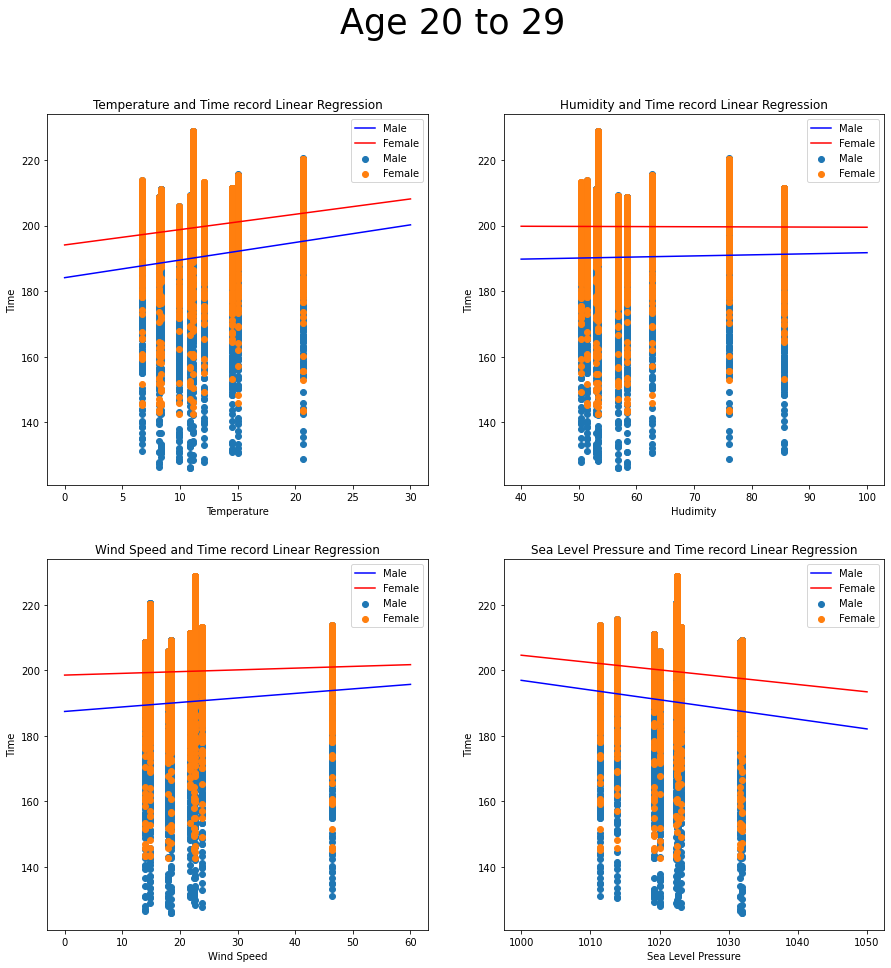

In [59]:
# for age 20-29
subPlots(age_20to30m["temp"],age_20to30m["humidity"],age_20to30m["windspeed"],age_20to30m["sealevelpressure"],age_20to30m["Time"],
age_20to30f["temp"],age_20to30f["humidity"],age_20to30f["windspeed"],age_20to30f["sealevelpressure"],age_20to30f["Time"],"Age 20 to 29")

In [60]:
# p and r value of temp for 30 to 39
prValue(age_30to40m.temp, age_30to40m.Time, age_30to40f.temp, age_30to40f.Time ,'Temperature','30 to 39')

Temperature for 30 to 39
 
p value for male = 7.794630392309681e-18
r value for male = 0.06838535497149295
p value for female = 3.3917450914475735e-11
r value for female = 0.11208145559588503
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


In [61]:
# p and r value of humidity for 30 to 39
prValue(age_30to40m.humidity, age_30to40m.Time, age_30to40f.humidity, age_30to40f.Time ,'Humidity','30 to 39')

Humidity for 30 to 39
 
p value for male = 0.6660154032638809
r value for male = 0.003435157592309207
p value for female = 0.6297525587996068
r value for female = 0.00817709117915488
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is not smaller than 0.05, significant level is not high enough


In [62]:
# p and r value of wind speed for 30 to 39
prValue(age_30to40m.windspeed, age_30to40m.Time, age_30to40f.windspeed, age_30to40f.Time ,'Wind Speed','30 to 39')

Wind Speed for 30 to 39
 
p value for male = 2.0632232620437138e-21
r value for male = 0.07551407756090937
p value for female = 0.006144879304052813
r value for female = 0.04645145024735798
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


In [63]:
# p and r value of sea level pressure for 30 to 39
prValue(age_30to40m.sealevelpressure, age_30to40m.Time, age_30to40f.sealevelpressure, age_30to40f.Time ,'Sea Level Pressure','30 to 39')

Sea Level Pressure for 30 to 39
 
p value for male = 1.5092095886819482e-42
r value for male = -0.10848390971953487
p value for female = 4.305455221914694e-09
r value for female = -0.09935775355254928
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


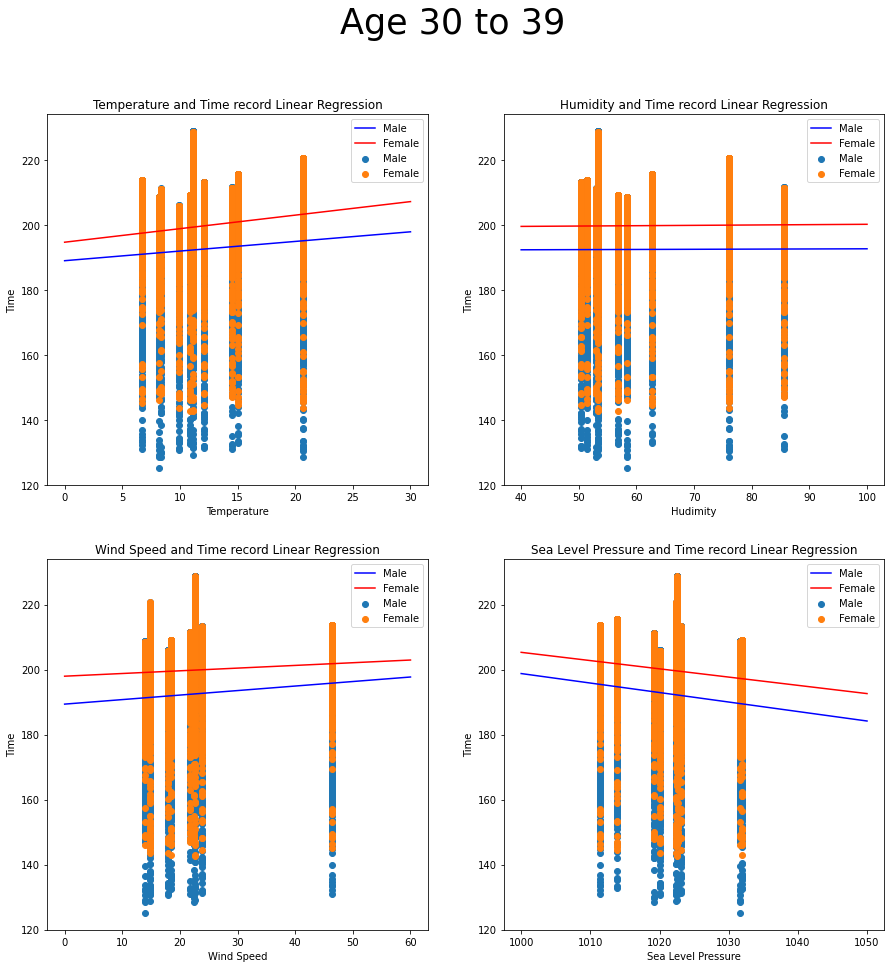

In [64]:
# for age 30-39
subPlots(age_30to40m["temp"],age_30to40m["humidity"],age_30to40m["windspeed"],age_30to40m["sealevelpressure"],age_30to40m["Time"],
age_30to40f["temp"],age_30to40f["humidity"],age_30to40f["windspeed"],age_30to40f["sealevelpressure"],age_30to40f["Time"],"Age 30 to 39")

In [70]:
# p and r value of temp for 40 to 49
prValue(age_40to50m.temp, age_40to50m.Time, age_40to50f.temp, age_40to50f.Time ,'Temperature','40 to 49')

Temperature for 40 to 49
 
p value for male = 2.9808651860163973e-26
r value for male = 0.08789240122644326
p value for female = 2.9325352021500806e-20
r value for female = 0.1943052066512876
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


In [65]:
# p and r value of humidity for 40 to 49
prValue(age_40to50m.humidity, age_40to50m.Time, age_40to50f.humidity, age_40to50f.Time ,'Humidity','40 to 49')

Humidity for 40 to 49
 
p value for male = 0.3540410841733806
r value for male = 0.007699423731753578
p value for female = 0.0010499706406596563
r value for female = 0.06962628607571003
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is smaller than 0.05, significant level is high


In [67]:
# p and r value of windspeed for 40 to 49
prValue(age_40to50m.windspeed, age_40to50m.Time, age_40to50f.windspeed, age_40to50f.Time ,'wind speed','40 to 49')

wind speed for 40 to 49
 
p value for male = 2.626508761329276e-20
r value for male = 0.07659532278991155
p value for female = 0.21444693938392226
r value for female = -0.02640581041544221
p value of male is smaller than 0.05, significant level is high
p value of female is not smaller than 0.05, significant level is not high enough


In [71]:
# p and r value of sea level pressure for 40 to 49
prValue(age_40to50m.sealevelpressure, age_40to50m.Time, age_40to50f.sealevelpressure, age_40to50f.Time ,'Sea Level Pressure','40 to 49')

Sea Level Pressure for 40 to 49
 
p value for male = 1.2463347512706262e-42
r value for male = -0.11332725124775228
p value for female = 0.06666241328227784
r value for female = -0.03900081066169466
p value of male is smaller than 0.05, significant level is high
p value of female is not smaller than 0.05, significant level is not high enough


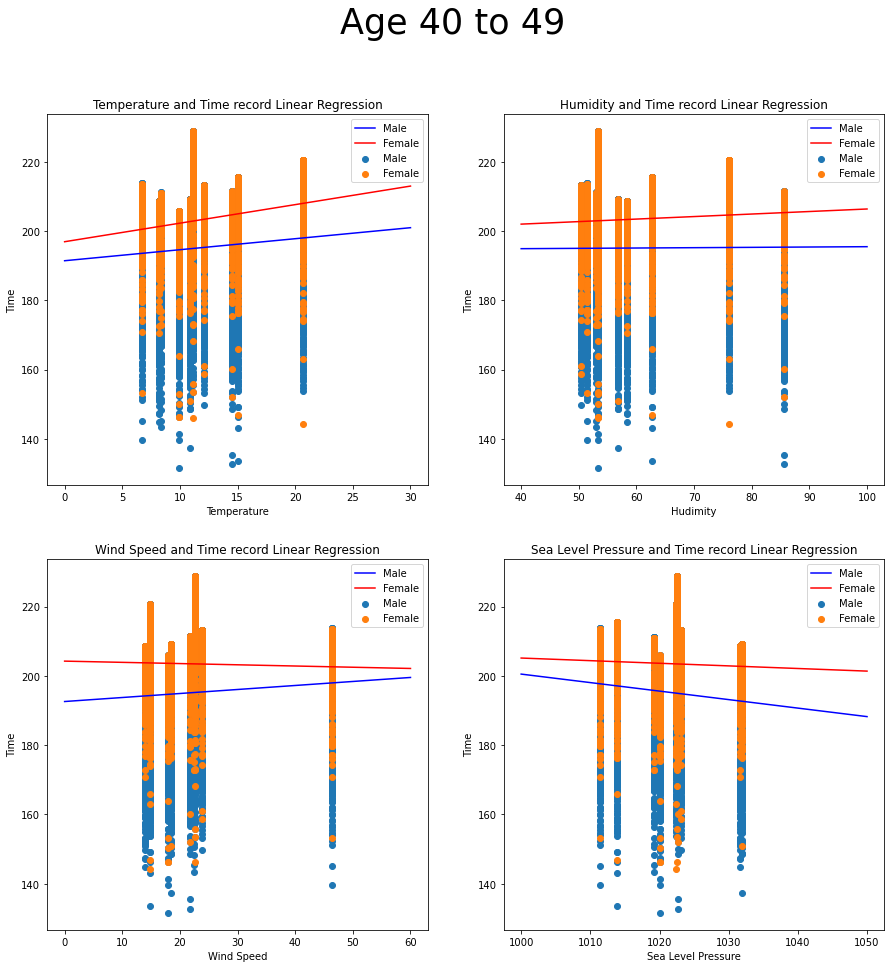

In [69]:
#plot for age 40-49
subPlots(age_40to50m["temp"],age_40to50m["humidity"],age_40to50m["windspeed"],age_40to50m["sealevelpressure"],age_40to50m["Time"],
age_40to50f["temp"],age_40to50f["humidity"],age_40to50f["windspeed"],age_40to50f["sealevelpressure"],age_40to50f["Time"],"Age 40 to 49")

In [72]:
# p and r value of temp for 50 to 59
prValue(age_50to60m.temp, age_50to60m.Time, age_50to60f.temp, age_50to60f.Time ,'Temperature','50 to 59')

Temperature for 50 to 59
 
p value for male = 9.351407059787333e-24
r value for male = 0.13688971301598868
p value for female = 0.0001668225067093365
r value for female = 0.18290491749115248
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


In [73]:
# p and r value of humidity for 50 to 59
prValue(age_50to60m.humidity, age_50to60m.Time, age_50to60f.humidity, age_50to60f.Time ,'Humidity','50 to 59')

Humidity for 50 to 59
 
p value for male = 0.0017534297214754889
r value for male = 0.04281059593529521
p value for female = 0.7806135301892526
r value for female = 0.013646706775921415
p value of male is smaller than 0.05, significant level is high
p value of female is not smaller than 0.05, significant level is not high enough


In [74]:
# p and r value of wind speed for 50 to 59
prValue(age_50to60m.windspeed, age_50to60m.Time, age_50to60f.windspeed, age_50to60f.Time ,'Wind Speed','50 to 59')

Wind Speed for 50 to 59
 
p value for male = 0.002069507956899982
r value for male = 0.04214042616034715
p value for female = 0.6795746707073208
r value for female = 0.020236889312007945
p value of male is smaller than 0.05, significant level is high
p value of female is not smaller than 0.05, significant level is not high enough


In [75]:
# p and r value of sea level pressure for 50 to 59
prValue(age_50to60m.sealevelpressure, age_50to60m.Time, age_50to60f.sealevelpressure, age_50to60f.Time ,'Sea Level Pressure','50 to 59')

Sea Level Pressure for 50 to 59
 
p value for male = 4.3039050730893e-09
r value for male = -0.08024558347881015
p value for female = 0.00966155398464491
r value for female = -0.12628878834677962
p value of male is smaller than 0.05, significant level is high
p value of female is smaller than 0.05, significant level is high


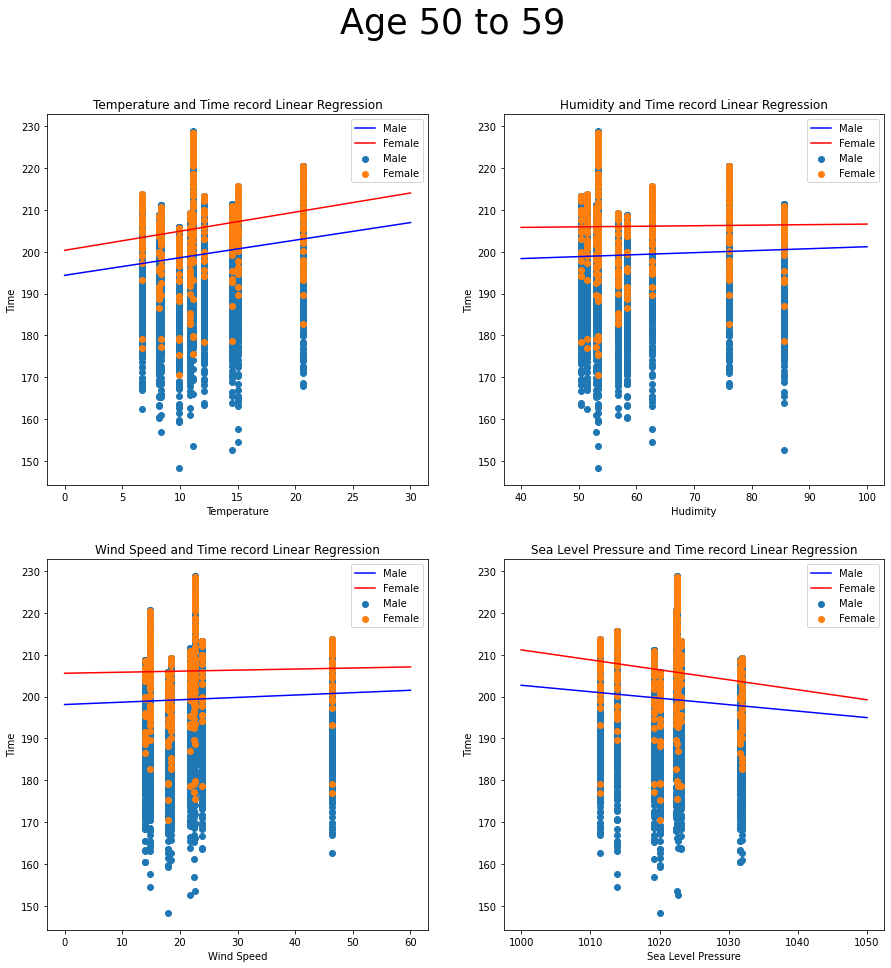

In [76]:
#plot for age 50-59
subPlots(age_50to60m["temp"],age_50to60m["humidity"],age_50to60m["windspeed"],age_50to60m["sealevelpressure"],age_50to60m["Time"],
age_50to60f["temp"],age_50to60f["humidity"],age_50to60f["windspeed"],age_50to60f["sealevelpressure"],age_50to60f["Time"],"Age 50 to 59")

In [77]:
# p and r value of temp for 60 and older
prValue(age_over60m.temp, age_over60m.Time, age_over60f.temp, age_over60f.Time ,'Temperature','60 and older')

Temperature for 60 and older
 
p value for male = 7.523785654755317e-08
r value for male = 0.23056756817403135
p value for female = 0.07891130024791466
r value for female = 0.3737986018498417
p value of male is smaller than 0.05, significant level is high
p value of female is not smaller than 0.05, significant level is not high enough


In [78]:
# p and r value of humidity for 60 and older
prValue(age_over60m.humidity, age_over60m.Time, age_over60f.humidity, age_over60f.Time ,'Humidity','60 and older')

Humidity for 60 and older
 
p value for male = 0.07664871139198419
r value for male = 0.07682688305283325
p value for female = 0.18435260557509772
r value for female = 0.2869354906353694
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is not smaller than 0.05, significant level is not high enough


In [79]:
# p and r value of wind speed for 60 and older
prValue(age_over60m.windspeed, age_over60m.Time, age_over60f.windspeed, age_over60f.Time ,'Wind Speed','60 and older')

Wind Speed for 60 and older
 
p value for male = 0.7217374831721584
r value for male = -0.015476002738500732
p value for female = 0.01728714807105627
r value for female = -0.49126366691902834
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is smaller than 0.05, significant level is high


In [80]:
# p and r value of sea level pressure for 60 and older
prValue(age_over60m.sealevelpressure, age_over60m.Time, age_over60f.sealevelpressure, age_over60f.Time ,'Sea Level Pressure','60 and older')

Sea Level Pressure for 60 and older
 
p value for male = 0.19688782714270361
r value for male = -0.056036771055708624
p value for female = 0.0385587067520007
r value for female = 0.43395018645814254
p value of male is not smaller than 0.05, significant level is not high enough
p value of female is smaller than 0.05, significant level is high


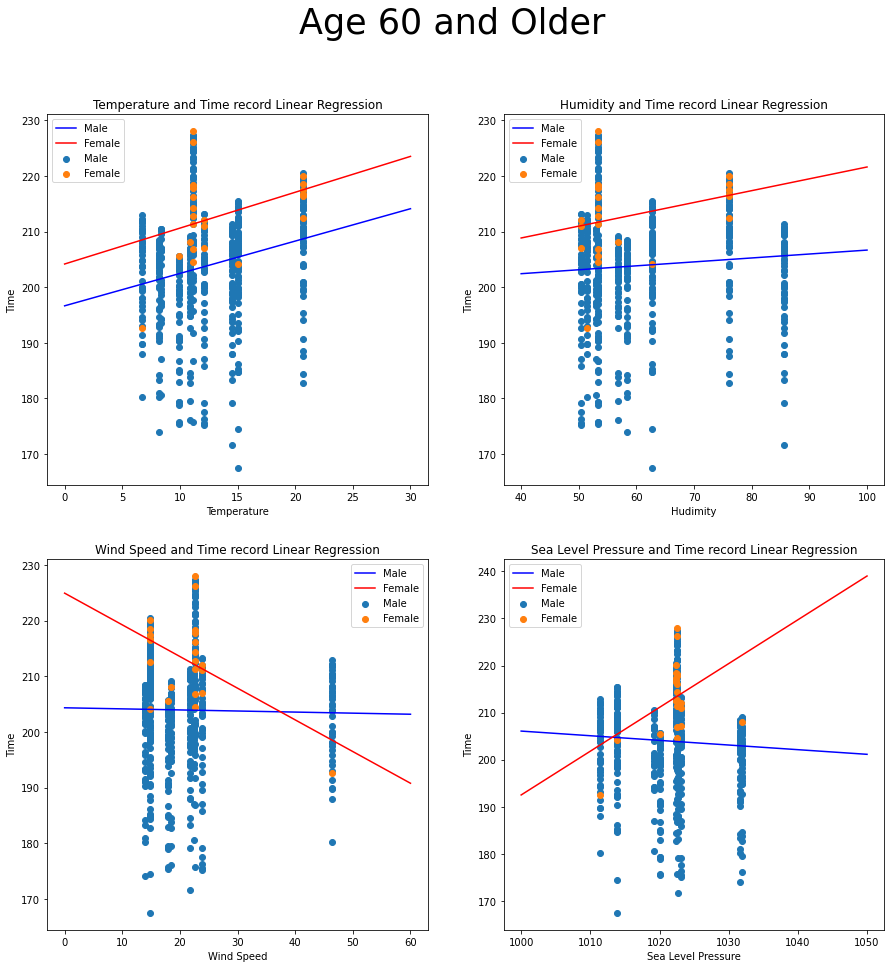

In [81]:
#plot for age 60 and older
subPlots(age_over60m["temp"],age_over60m["humidity"],age_over60m["windspeed"],age_over60m["sealevelpressure"],age_over60m["Time"],
age_over60f["temp"],age_over60f["humidity"],age_over60f["windspeed"],age_over60f["sealevelpressure"],age_over60f["Time"],"Age 60 and Older")

In [491]:
print("male")
print(len(age_under20m)/len(result))
print(len(age_20to30m)/len(result))
print(len(age_30to40m)/len(result))
print(len(age_40to50m)/len(result))
print(len(age_50to60m)/len(result))
print(len(age_over60m)/len(result))
print("female")
print(len(age_under20f)/len(result))
print(len(age_20to30f)/len(result))
print(len(age_30to40f)/len(result))
print(len(age_40to50f)/len(result))
print(len(age_50to60f)/len(result))
print(len(age_over60f)/len(result))

male
0.0014366700318397142
0.12823250757163937
0.30655432165877144
0.28133493826201755
0.10367321581113613
0.010328492661334161
female
0.00013590121922808107
0.04925448474023453
0.06752349149646657
0.04294478527607362
0.008134658693795139
0.00044653257746369494


In [504]:
print("male")
print(len(age_under20m))
print(len(age_20to30m))
print(len(age_30to40m))
print(len(age_40to50m))
print(len(age_50to60m))
print(len(age_over60m))
print("female")
print(len(age_under20f))
print(len(age_20to30f))
print(len(age_30to40f))
print(len(age_40to50f))
print(len(age_50to60f))
print(len(age_over60f))

male
74
6605
15790
14491
5340
532
female
7
2537
3478
2212
419
23
